### CS 421 PROJECT

In this project, you will be working with data extracted from famous recommender systems type datasets: you are provided with a large set of interactions between users (persons)  and items (movies). Whenever a user "interacts" with an item, it watches the movie and gives a mark or "rating": you can interpret a rating of "1" as a "like", a rating of "-1" as a "dislike" and a rating of "0" as a neutral "meh" rating. 




In this exercise, we will **not** be performing the recommendation task per se. Instead, we will identify *anomalous users*. In the dataset that you are provided with, some of the data was corrupted. Whilst most of the data comes from real life user-item interactions from a famous movie rating website, some "users" are anomalous: they were generated by me according to some undisclosed procedure. 

You are provided with two data frames: the first one ("ratings") contains the interactions provided to you, and the second one ("labels") contains the labels for the users.

As you can see, the three columns in "ratings" correspond to the user ID, the item ID and the rating. Thus, each row of "ratings" contains a single interaction. For instance, if the row "142, 152, 1" is present, this means that the user with ID 142 has given the movie 152 a positive rating of "1" ("like").

The dataframe "labels" has two columns. In the first column we have the user ids, whilst the second column contains the labels. A label of 1 indicates that the user is fake (generated by me), whilst a label of 0 denotes a natural user (coming from real life interactions). 

For instance, if the labels matrix contains the line "142, 1", it means that all of the ratings given by the user with id 142 are fake. This means all lines in the dataframe "ratings" which start with the userID 142 correspond to fake interactions. 

#### Evaluation

Your task is to be able to classify unseen instances as either anomalies or non anomalies (guess whether they are real users or if they were generated by me). 

There are **far more** normal users than anomalies in the dataset, which makes this a very heavily **unbalanced dataset**. Thus, accuracy will not be a good measure of performance, since simply predicting that every user is normal will give good accuracy. Thus, we need to use some other evaluation metrics (see lecture notes from week 3). 

THE **EVALUATION METRICS** are:  THE **AUC** (AREA UNDER CURVE), the **PRECISION**, THE **RECALL**, and the **F1 score**. The **main metric** will be the **AREA UNDER CURVE**, and it will by default be used to rank teams. This means your programs should return an **anomaly score** for each user (the higher the score, the more likely the model think the sample is anomalous).  

Every few weeks, we will evaluate the performance of each team (on an *unseen test set* I will provide) in terms of AUC, PRECISION, RECALL and F1 score, and rank the teams by **AUC** and by F1 score to distinguish between ties, where a tie is defined by a difference of less than 0.005 in AUC.  

The difficulty implied by **the generation procedure of the anomalies MAY CHANGE as the project evolves: depending on how well the teams are doing, I may generate easier or harder anomalies**.

Together with this file, you are provided with a first batch of labelled examples "first_batch_with_labels_likes.npz". You are also provided with the test samples to rank by the next round (without labels) in the file "second_batch_likes.npz".

The **first round** will take place after recess (week 9): this means that I will **release the next test set on the tuesday of week 9**, and you must hand in your scores for the second batch before the **WEDNESDAY at NOON (11th of October)**. Your submission will be a numpy array containing the **scores** for each of the users I will send you for each test set. We will then look at the results together on the thursday.  

We will check everyone's performance in this way every week (once on  week 10, once on week 11 and once on week 12). 

Whilst performance (expressed in terms of AUC and your ranking compared to other teams) at **each of the check points** (weeks 9 to 12 inclusive) is an **important component** of your **final grade**, the **final report** and the detail of the various methods you will have tried will **also** be very **important**. Ideally, to get perfect marks (A+), you should try at least **two supervised methods** and **two unsupervised methods**, as well as be ranked the **best team** in terms of performance.



In [38]:
import numpy as np
import pandas as pd
data=np.load("first_batch_with_labels_likes.npz")

In [39]:
data['X']

array([[1220,    6,    0],
       [1220,   21,    1],
       [1220,   31,    0],
       ...,
       [ 566,  856,   -1],
       [ 566,  862,    1],
       [ 566,  867,    0]])

In [40]:
X=data["X"]
y=data["y"]



XX=pd.DataFrame(X)
yy=pd.DataFrame(y)
XX.rename(columns={0:"user",1:"item",2:"rating"},inplace=True)

In [41]:
XX.head()

,user,item,rating
0,1220,6,0
1,1220,21,1
2,1220,31,0
3,1220,33,0
4,1220,35,-1


In [42]:
yy.rename(columns={0:"user",1:"label"},inplace=True)

In [43]:
yy['label'][1]

0

In [44]:
yy.head(10)

,user,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [9]:
# data = {}
# XX2 = XX.sort_values(by="item")
# XX2['rating'] += 2

# for i in XX2['user'].unique():
#     data[i] = {}
#     for j in XX2['item'].unique():
#         data[i][j] = 4

# for i in range(len(XX2)):
#     user = XX2['user'][i]
#     rating = XX2['rating'][i]
#     item = XX2['item'][i]

#     data[user][item] = rating

# data = pd.DataFrame.from_dict({'user':data.keys(), 'ratings':data.values()})

# for i in range(len(data)):
#     val_list = list(data['ratings'][i].values())
#     new_str = ""
#     for j in val_list:
#         new_str += str(j)
#     data['ratings'][i] = int(new_str)

In [10]:
# data = {}
# XX2 = XX.sort_values(by="item")

# for i in range(len(XX2)):
#     user = XX2['user'][i]
#     rating = XX2['rating'][i]

#     if user in data:
#         data[user] += rating
#     else:
#         data[user] = rating

# data = pd.DataFrame({'user':data.keys(), "ratings":data.values()})

In [11]:

# X = pd.get_dummies(XX, columns=['item'], ).drop(['rating'], axis=1)
# X = X.replace(False, 2)
# X = X.groupby(by='user').aggregate('min')

# for i in X.index:
#     X2 = XX.loc[XX['user']==i]
#     for j in X2['item']:
#         try:
#             X[f'item_{j}'][i] = X2['rating'].loc[X2['item']==j].iloc[0]
#         except:
#             None

# X = X.reset_index()

In [49]:
data = []

items = XX['item'].unique()
XX2 = XX.copy(deep=True)

for i in XX2['user'].unique():
    X2 = XX2.loc[XX2['user']==i]
    X2_items = list(X2['item'])

    neutral, negative, positive, none = 0,0,0,0

    for rating in X2['rating']:
        if rating == -1:
            negative += 1
        elif rating == 0:
            neutral += 1
        else:
            positive += 1

    none = (len(items) - len(X2['rating']))*2

    data.append({'user':i,'negative_ratings':negative, 'neutral_ratings':neutral, 'positive_ratings':positive, 'no_rating': none})

X = pd.DataFrame(data)
X = X.groupby(by='user').aggregate('sum').reset_index()

In [66]:
total_interactions = []
negative_percentage = []
neutral_percentage = []
positive_percentage = []
no_percentage = []

for i in range(len(X)):
    total = sum([X['negative_ratings'][i], X['neutral_ratings'][i], X['positive_ratings'][i]])
    # total = total+X['no_rating'][i]
    total_interactions.append(total)
    negative_percentage.append(100*(X['negative_ratings'][i]/total))
    neutral_percentage.append(100*(X['neutral_ratings'][i]/total))
    positive_percentage.append(100*(X['positive_ratings'][i]/total))
    # no_percentage.append(100*(X['no_rating'][i]/total))

X['total_interactions'] = total_interactions
X['negative_percentage'] = negative_percentage
X['neutral_percentage'] = neutral_percentage
X['positive_percentage'] = positive_percentage
# X['no_percentage'] = no_percentage

In [15]:
# X['rating_val'] = X['no_rating']*((X['negative_ratings']*-2 + X['neutral_ratings'] + X['positive_ratings']*2)/X['total_interactions'])

In [67]:
labels = []

for i in range(len(X)):
    labels.append(yy['label'][X['user'][i]])

In [68]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve

def getScores(true, pred):
    fpr, tpr, thresholds = roc_curve(true,pred)
    auc_score = roc_auc_score(true,pred)

    best_threshold = (tpr+(1-fpr)/2)
    best_threshold = thresholds[np.argmax(best_threshold)]

    pred_threshold = (pred >= best_threshold).astype(int)
    precision = precision_score(true, pred_threshold)
    recall = recall_score(true, pred_threshold)
    f1 = f1_score(true, pred_threshold)

    return {"AUC": auc_score, "f1":f1, "recall":recall, "precision":precision}

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

pol_ftrs = 4

lr = LogisticRegression(solver="saga", max_iter=1000000, penalty='l2', tol=1e-5)
X2_train, X2_val = PolynomialFeatures(pol_ftrs, interaction_only=True).fit_transform(X_train), PolynomialFeatures(pol_ftrs, interaction_only=True).fit_transform(X_val)
# lr = AdaBoostClassifier(estimator=lr, n_estimators=50)
lr.fit(X2_train, Y_train)
y_pred = lr.predict(X2_val)

In [72]:
print(getScores(Y_val, y_pred))

{'AUC': 0.7084492790285859, 'f1': 0.36990595611285265, 'recall': 1.0, 'precision': 0.22692307692307692}


__________________________________________________________________________________________

# Big Mess Below

## Enter at your own safety!!

In [141]:
from itertools import combinations

def predict_polReg(df, solver='liblinear', penalty='none', tol=1e-4, pol_ftrs=2):
    X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.3, random_state=42)
    X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

    lr = LogisticRegression(solver=solver, max_iter=1000000, penalty=penalty, tol=tol, class_weight='balanced')
    X2_train, X2_val = PolynomialFeatures(pol_ftrs, interaction_only=True).fit_transform(X_train), PolynomialFeatures(pol_ftrs, interaction_only=True).fit_transform(X_val)
    lr.fit(X2_train, Y_train)
    y_pred = lr.predict(X2_val)

    return roc_auc_score(Y_val, y_pred)

def test_columns(df):
    score_col_combo = []
    col_combinations = []

    df = df.groupby(by='user').aggregate('sum')
    cols = df.columns

    for i in range(1, len(cols) + 1):
        col_combinations.extend(combinations(cols, i))

    for cols in col_combinations:
        test_df = df[list(cols)].reset_index()
        test_score = predict_polReg(test_df)

        score_col_combo.append({'cols':cols,'score':test_score})

    score_col_combo = pd.DataFrame(score_col_combo).sort_values(by='score')
    return score_col_combo

def get_params():
    solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    tols = [1e-4, 6e-5, 2e-5, 8e-6, 4e-6, 1e-6]
    penalty = [['l2', 'none'],['l1','l2'],['l2','none'],['l2','none'],['l2','none'],['l1','l2']]
    ftrs = [2,3,4,5,6]

    return {'solver':solvers,'tol':tols,'penalty':penalty,'ftrs':ftrs}

def test_params(df):
    scores_params = []
    params = get_params()

    best_params = {'solver':'liblinear','tol':1e-4,'penalty':'none','ftrs':2}

    for i in params.keys():
        curr_best_score = 0
        best_curr_option = ''

        dummy_params = best_params.copy()

        for j in params[i]:
            a = j
            if type(j) == list:
                for a in j:
                    
            dummy_params[i] = a

            if dummy_params['solver'] == 'liblinear':
                dummy_params['penalty'] = 'l2'

            test_score = predict_polReg(df, dummy_params['solver'], dummy_params['penalty'], dummy_params['tol'], dummy_params['ftrs'])
            scores_params.append({'score':test_score, 'settings':dummy_params})

            if test_score > curr_best_score:
                best_curr_option = j
        
        best_params[i] = best_curr_option

    scores_params = pd.DataFrame(scores_params).sort_values(by='score')
    return scores_params


In [142]:
df = X.groupby(by='user').aggregate('sum')
df = df[['negative_ratings','positive_ratings','total_interactions','negative_percentage','neutral_percentage']].reset_index()

In [143]:
params_scores = test_params(df)

c:\Users\zorko\anaconda3\envs\cs421\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\zorko\anaconda3\envs\cs421\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\zorko\anaconda3\envs\cs421\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\zorko\anaconda3\envs\cs421\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\zorko\anaconda3\envs\cs421\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'none' (deprecated), 'l2', 'l1', 'elasticnet'} or None. Got ['l2', 'none'] instead.

In [ ]:
# No no_percentage : No total adjustment : No Normalization
{'cols': ('negative_ratings',
  'positive_ratings',
  'total_interactions',
  'negative_percentage',
  'neutral_percentage'),
 'score': 0.7740429505135388}

# No no_percentage : No total adjustment : Min/Max Norm w/out percentages
{'cols': ('negative_ratings',
  'positive_ratings',
  'total_interactions',
  'negative_percentage',
  'neutral_percentage',
  'positive_percentage'),
 'score': 0.7588702147525677}

# No no_percentage : No total adjustment : Mean Norm Before w/out percentages
{'cols': ('neutral_ratings',
  'no_rating',
  'total_interactions',
  'negative_percentage'),
 'score': 0.7588702147525677}

# No no_percentage : No total adjustment : Min/Max Norm w/ percentages
{'cols': ('neutral_ratings', 'neutral_percentage', 'positive_percentage'),
 'score': 0.7621381886087768}

# No no_percentage : No total adjustment : Mean Norm w/ percentages
{'cols': ('negative_ratings',
  'neutral_ratings',
  'positive_ratings',
  'no_rating',
  'negative_percentage',
  'positive_percentage'),
 'score': 0.7675070028011205}

### Liblinear : 
##### ftrs=3  tol=1e-6  penalty=l2  AUC=0.76
##### ftrs=4  tol=4e-6  penalty=l2  AUC=0.77  +interaction_only
### Saga :   
##### ftrs=3  tol=1e-7  penalty=l2  AUC=0.74
### lbfgs :
##### ftrs=4  tol=1e-5  penalty=l2  AUC=0.78

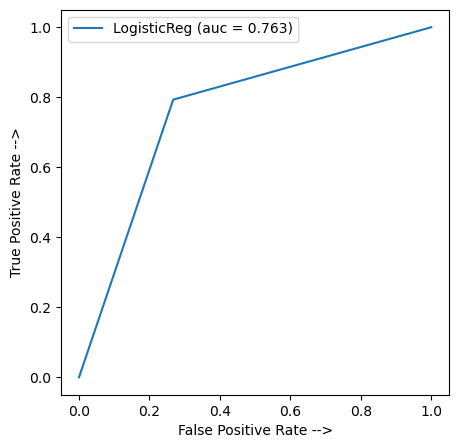

In [93]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(Y_val, y_pred)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, label="LogisticReg (auc = %0.3f)"%auc_score)

plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")

plt.legend()
plt.show()